In [4]:
import numpy as np
import json
import collections
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
def data_processing(data):
	train_set, valid_set, test_set = data['train_data'], data['val_data'], data['test_data']
	Xtrain = train_set["features"]
	ytrain = train_set["labels"]
	Xval = valid_set["features"]
	yval = valid_set["labels"]
	Xtest = test_set["features"]
	ytest = test_set["labels"]

	Xtrain = np.array(Xtrain)
	Xval = np.array(Xval)
	Xtest = np.array(Xtest)

	ytrain = np.array(ytrain)
	yval = np.array(yval)
	ytest = np.array(ytest)
	
	return Xtrain, ytrain, Xval, yval, Xtest, ytest

In [6]:
def data_processing_with_transformation(data, do_minmax_scaling=True, do_normalization=False):
    train_set, valid_set, test_set = data['train_data'], data['val_data'], data['test_data']
    Xtrain = train_set["features"]
    ytrain = train_set["labels"]
    Xval = valid_set["features"]
    yval = valid_set["labels"]
    Xtest = test_set["features"]
    ytest = test_set["labels"]
    
    Xtrain = np.array(Xtrain)
    Xval = np.array(Xval)
    Xtest = np.array(Xtest)
    
    ytrain = np.array(ytrain)
    yval = np.array(yval)
    ytest = np.array(ytest)
    
    # We load data from json here and turn the data into numpy array
    # You can further perform data transformation on Xtrain, Xval, Xtest

    def minmax_scaling(X):
    
        #####################################################
        #				 YOUR CODE HERE					    #
        
        # Reference: https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html
        transposed_X = X.transpose()
        
        # Min-max scaling for each feature
        for i, feature in enumerate(transposed_X):
            min_val = np.min(feature)
            max_val = np.max(feature)
        
            # Interpolates linearly so each value in the feature vector 
            # falls between 0 and 1, inclusively
            feature_new = (feature - min_val) / (max_val - min_val)
            transposed_X[i] = feature_new
        
        X = transposed_X.transpose()
        
        return X
    
        #####################################################


    # Min-Max scaling
    if do_minmax_scaling:
    
    #####################################################
    #				 YOUR CODE HERE					    #
        Xtrain = minmax_scaling(Xtrain)
        Xval = minmax_scaling(Xval)
        Xtest = minmax_scaling(Xtest)
    
    #####################################################
    
    # Normalization
    def normalization(X):
    #####################################################
    #				 YOUR CODE HERE					    #
    
        # Reference: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        for i, x in enumerate(X):
            norm = np.linalg.norm(x)
            normalized_x = np.divide(x, norm)
            X[i] = normalized_x
    
    #####################################################
    
        return X

    
    if do_normalization:
        Xtrain = normalization(Xtrain)
        Xval = normalization(Xval)
        Xtest = normalization(Xtest)

    return Xtrain, ytrain, Xval, yval, Xtest, ytest


In [7]:
def compute_l2_distances(Xtrain, X):
	"""
	Compute the distance between each test point in X and each training point
	in Xtrain.
	Inputs:
	- Xtrain: A numpy array of shape (num_train, D) containing training data
	- X: A numpy array of shape (num_test, D) containing test data.
	Returns:
	- dists: A numpy array of shape (num_test, num_train) where dists[i, j]
	  is the Euclidean distance between the ith test point and the jth training
	  point.
	"""
    #####################################################
	#				 YOUR CODE HERE					    #

	num_test = X.shape[0]
	num_train = Xtrain.shape[0]

	dists = np.empty((num_test, num_train))

	for i in range(num_test):
		for j in range(num_train):
			diffs = X[i] - Xtrain[j]
			squared_diffs = np.square(diffs)
			dists[i][j] = np.sqrt(np.sum(squared_diffs))
    #####################################################	
    
	return dists

In [8]:
def compute_cosine_distances(Xtrain, X):
    """
    Compute the distance between each test point in X and each training point
    in Xtrain.
    Inputs:
    - Xtrain: A numpy array of shape (num_train, D) containing training data
    - X: A numpy array of shape (num_test, D) containing test data.
    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
    is the Cosine distance between the ith test point and the jth training
    point.
    """
    #####################################################
    #				 YOUR CODE HERE					    #
    
    num_test = X.shape[0]
    num_train = Xtrain.shape[0]

    dists = np.empty((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            
            dot_product_x_xprime = np.dot(X[i], Xtrain[j])
            norm_x = np.linalg.norm(X[i])
            norm_xprime = np.linalg.norm(Xtrain[j])

            # Check for zero norm to avoid division by zero
            if norm_x == 0 or norm_xprime == 0:
                dists[i, j] = 1
            else:
                dists[i, j] = 1 - (dot_product_x_xprime / (norm_x * norm_xprime))

    #####################################################
    return dists


In [9]:
def predict_labels(k, ytrain, dists):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.
    Inputs:
    - k: The number of nearest neighbors used for prediction.
    - ytrain: A numpy array of shape (num_train,) where ytrain[i] is the label
      of the ith training point.
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.
    Returns:
    - ypred: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].
    """
    #####################################################
    #				 YOUR CODE HERE					    #
    num_test = dists.shape[0]
    
    # Reference: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
    ypred = np.zeros(num_test)
    
    for i in range(num_test):
        # Sort based on distances
        dist_label_pairs = zip(dists[i], ytrain)
        first_k_dist = sorted(dist_label_pairs, key=lambda x: x[0])[:k]
    
        # Count occurrences of each label in the k-nearest neighbors
        label_counts = Counter([x[1] for x in first_k_dist])
    
        # Predict the label based on the majority vote
        if label_counts[1] > (k // 2):
            ypred[i] = 1
    #####################################################
    
    return ypred

In [10]:
def compute_error_rate(y, ypred):
	"""
	Compute the error rate of prediction based on the true labels.
	Inputs:
	- y: A numpy array with of shape (num_test,) where y[i] is the true label
	  of the ith test point.
	- ypred: A numpy array with of shape (num_test,) where ypred[i] is the
	  prediction of the ith test point.
	Returns:
	- err: The error rate of prediction (scalar).
	"""
	#####################################################
	#				 YOUR CODE HERE					    #
	num_test = y.shape[0]

	# Counts wrongly classified data point
	total_mismatches = 0
	for i in range(num_test):
		if y[i] != ypred[i]:
			total_mismatches += 1

	err = total_mismatches / num_test
    #####################################################

	return err



In [11]:
def find_best_k(K, ytrain, dists, yval):
    """
    Find best k according to validation error rate.
    Inputs:
    - K: A list of ks.
    - ytrain: A numpy array of shape (num_train,) where ytrain[i] is the label
    of the ith training point.
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
    is the distance between the ith test point and the jth training
    point.
    - yval: A numpy array with of shape (num_val,) where y[i] is the true label
    of the ith validation point.
    Returns:
    - best_k: The k with the lowest error rate.
    - validation_error: A list of error rate of different ks in K.
    - best_err: The lowest error rate we get from all ks in K.
    """
    #####################################################
    #				 YOUR CODE HERE					    #
    best_k = None
    best_err = float('inf') #do not set to none, it fails in below condition comparison 
    validation_error = []
    
    for k in K:
        ypred = predict_labels(k, ytrain, dists)
        error_rate = compute_error_rate(yval, ypred)
        validation_error.append(error_rate)
    
        if error_rate < best_err:
            best_err = error_rate
            best_k = k
    #####################################################
    return best_k, validation_error, best_err

Xtrain.shape: (139, 30)
ytrain.shape: (139,)
Xval.shape: (91, 30)
yval.shape: (91,)
Xtest.shape: (169, 30)
ytest.shape: (169,)
The validation error rate is 0.07692307692307693 in Problem Set 1.1

The validation error rate is 0.04395604395604396 in Problem Set 1.2 when using normalization

The validation error rate is 0.04395604395604396 in Problem Set 1.2 when using minmax_scaling

The validation error rate is 0.04395604395604396 in Problem Set 1.3, which use cosine distance



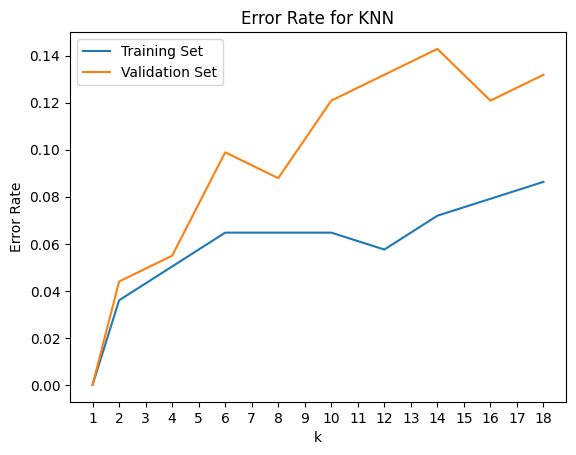


    (1) Report and draw a curve based on the error rate of your model on the training set for each k. What do you observe? (2pts) 


        a. When k = 1, we observe the lowest error. 

        
        b. As k increases and finding the k-nearest neighbors (knn) becomes more complex, the error rate is higher compared to the first few iterations. 

        
        c. There is a drop at k = 12. For 6 ≤ k ≤ 20, k = 12 exhibits the lowest error. 

        
        d. The error line remains flat between k = 6 and k = 10. 


    (2) Report and draw a curve based on the error rate of your model on the validation set for each k. What is your best k? (2pts) 


        a. For 1 ≤ k ≤ 20 1≤K≤20, the error rate is higher than that of the training set. 


        b. This is possible because the sample population is smaller than the training population, which impacts the performance of the KNN. 

        
        c. It is possible that the validation set has fewer data points, and a single error 

In [16]:
def main():
    input_file = 'breast_cancer_dataset.json'
    output_file = 'knn_output.txt'
    
    #==================Problem Set 1.1=======================
    
    with open(input_file) as json_data:
        data = json.load(json_data)
    
    # Compute distance matrix
    Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(data)
    print("Xtrain.shape:", Xtrain.shape) 
    print("ytrain.shape:", ytrain.shape) 
    print("Xval.shape:", Xval.shape) 
    print("yval.shape:", yval.shape) 
    print("Xtest.shape:", Xtest.shape) 
    print("ytest.shape:", ytest.shape) 
    
    dists = compute_l2_distances(Xtrain, Xval)
    
    # Compute validation accuracy when k=4
    k = 4
    ypred = predict_labels(k, ytrain, dists)
    err = compute_error_rate(yval, ypred)
    print("The validation error rate is", err, "in Problem Set 1.1")
    print()

    #==================Problem Set 1.2=======================

    # Compute distance matrix
    Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(data, do_minmax_scaling=False, do_normalization=True)
    
    dists = compute_l2_distances(Xtrain, Xval)
    
    # Compute validation accuracy when k=4
    k = 4
    ypred = predict_labels(k, ytrain, dists)
    err = compute_error_rate(yval, ypred)
    print("The validation error rate is", err, "in Problem Set 1.2 when using normalization")
    print()
    
    # Compute distance matrix
    Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(data, do_minmax_scaling=True, do_normalization=False)
    
    dists = compute_l2_distances(Xtrain, Xval)
    
    # Compute validation accuracy when k=4
    k = 4
    ypred = predict_labels(k, ytrain, dists)
    err = compute_error_rate(yval, ypred)
    print("The validation error rate is", err, "in Problem Set 1.2 when using minmax_scaling")
    print()
	
    #==================Problem Set 1.3=======================

    # Compute distance matrix
    Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(data)
    dists = compute_cosine_distances(Xtrain, Xval)
    
    # Compute validation accuracy when k=4
    k = 4
    ypred = predict_labels(k, ytrain, dists)
    err = compute_error_rate(yval, ypred)
    print("The validation error rate is", err, "in Problem Set 1.3, which use cosine distance")
    print()

    #==================Problem Set 1.4=======================
    # Compute distance matrix
    Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(data)
    
    #======performance of different k in training set=====
    K = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]
    #####################################################
    #				 YOUR CODE HERE					    #
    train_errors = []
    validation_errors = []

    # Train and evaluate models for each k
    for k in K:

       #compute_cosine_distances(Xtrain, X) Compute the distance between each test point in X and each training point in Xtrain.
    
        # Report and draw a curve based on the error rate of your model on the training set for each k
        dists = compute_l2_distances(Xtrain, Xtrain)
        ypred = predict_labels(k, ytrain, dists)
        error_rate = compute_error_rate(ytrain, ypred)
        train_errors.append(error_rate)
        
        #Report and draw a curve based on the error rate of your model on the validation set for each k.
        dists = compute_l2_distances(Xval, Xval) 
        ypred = predict_labels(k, yval, dists)
        error_rate = compute_error_rate(yval, ypred)
        validation_errors.append(error_rate)
    
    # Plot the curves
    plt.xticks(np.arange(1, 20, 1))
    plt.plot(K, train_errors, label='Training Set')
    plt.plot(K, validation_errors, label='Validation Set')
    plt.xlabel('k')
    plt.ylabel('Error Rate')
    plt.title('Error Rate for KNN')
    plt.legend()
    plt.show()

    print("""
    (1) Report and draw a curve based on the error rate of your model on the training set for each k. What do you observe? (2pts) \n

        a. When k = 1, we observe the lowest error. \n
        
        b. As k increases and finding the k-nearest neighbors (knn) becomes more complex, the error rate is higher compared to the first few iterations. \n
        
        c. There is a drop at k = 12. For 6 ≤ k ≤ 20, k = 12 exhibits the lowest error. \n
        
        d. The error line remains flat between k = 6 and k = 10. \n

    (2) Report and draw a curve based on the error rate of your model on the validation set for each k. What is your best k? (2pts) \n

        a. For 1 ≤ k ≤ 20 1≤K≤20, the error rate is higher than that of the training set. \n

        b. This is possible because the sample population is smaller than the training population, which impacts the performance of the KNN. \n
        
        c. It is possible that the validation set has fewer data points, and a single error rate contributes more to the overall error rate. \n
        
        d. There is a drop in the error rate when k increases from 6 to 8, and another drop occurs between 16 to 18. \n
            
                                       
    (3) What do you observe by comparing the difference between the two curves? (2pts) \n

        a. For all k's, the error rate for the training set is lower than that for the validation set. \n
        
        b. The rate of change is higher for the validation set. \n
        
        c. The error rate drop on the validation set may not necessarily be the same as in the training set.\n
            
    (4) What is the final test set error rate you get using your best-k? (1pt) \n

        In Problem Set 1.4, we use the best k =  6 with the best validation error rate 0.054945054945054944\n
        Using the best k, the final test error rate is 0.07100591715976332\n


    (5) Comment on these results from the perspective of overfitting, generalization and hyper-parameter tuning. (3pts).\n

        a. Small values of k, insufficiently smooth Dat, imbalanced Datasets in general can lead to overfitting.\n
           For k=1, it is overfitting, becuase the nearest neighbor is the point itself.\n
        c. Choosing smaller values for k, such as 1 or 3, tends to make the model more sensitive to local patterns. \n
           Larger values for k, increase the influence of a larger number of neighbors, making the model more general.\n
        d. Trying X fold CV on different Ks can help us to find the best k.\n
    """)

    #####################################################
    
    #==========select the best k by using validation set==============
    dists = compute_l2_distances(Xtrain, Xval)
    best_k, validation_error, best_err = find_best_k(K, ytrain, dists, yval)
    
    #===============test the performance with your best k=============
    dists = compute_l2_distances(Xtrain, Xtest)
    ypred = predict_labels(best_k, ytrain, dists)
    test_err = compute_error_rate(ytest, ypred)
    print("In Problem Set 1.4, we use the best k = ", best_k, "with the best validation error rate", best_err)
    print("Using the best k, the final test error rate is", test_err)
    #====================write your results to file===================
    f=open(output_file, 'w')
    for i in range(len(K)):
        f.write('%d %.3f' % (K[i], validation_error[i])+'\n')
        f.write('%s %.3f' % ('test', test_err))
    f.close()

if __name__ == "__main__":
	main()